<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import" data-toc-modified-id="Import-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import</a></span></li><li><span><a href="#Load-data" data-toc-modified-id="Load-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#Create-graph" data-toc-modified-id="Create-graph-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Create graph</a></span></li><li><span><a href="#Basic-draws" data-toc-modified-id="Basic-draws-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Basic draws</a></span></li><li><span><a href="#Plotly" data-toc-modified-id="Plotly-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Plotly</a></span></li><li><span><a href="#Dash" data-toc-modified-id="Dash-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Dash</a></span></li><li><span><a href="#PyVis" data-toc-modified-id="PyVis-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>PyVis</a></span></li></ul></div>

# Import

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Load data

In [2]:
df = pd.read_csv("book1.csv")
df = df.loc[df['weight']>10, :]
df1 = df[['Source','Target']]
df1

Source              Target
8    Aemon-Targaryen-(Maester-Aemon)        Jeor-Mormont
9    Aemon-Targaryen-(Maester-Aemon)            Jon-Snow
16                Aerys-II-Targaryen    Robert-Baratheon
17                              Aggo  Daenerys-Targaryen
30                    Alliser-Thorne            Jon-Snow
..                               ...                 ...
658                   Sandor-Clegane         Sansa-Stark
664                             Shae    Tyrion-Lannister
666                           Shagga    Tyrion-Lannister
676                 Tyrion-Lannister     Tywin-Lannister
683                     Waymar-Royce     Will-(prologue)

[175 rows x 2 columns]

# Create graph

In [3]:
G = nx.Graph()
G = nx.from_pandas_edgelist(df1, 'Source', 'Target')

# Basic draws

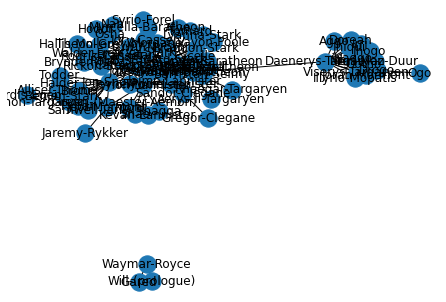

In [4]:
nx.draw(G, with_labels=True)

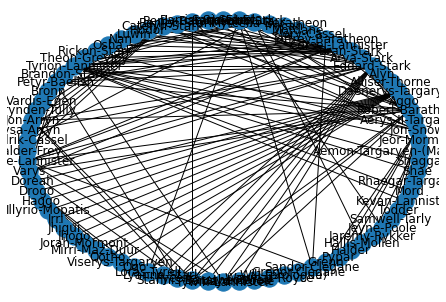

In [6]:
nx.draw_circular(G, with_labels=True)

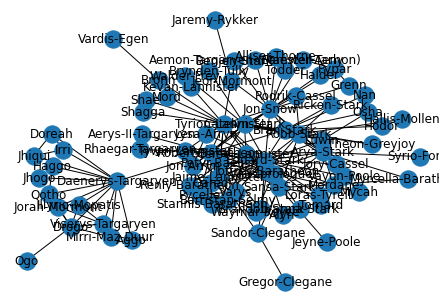

In [5]:
nx.draw_kamada_kawai(G, with_labels=True)

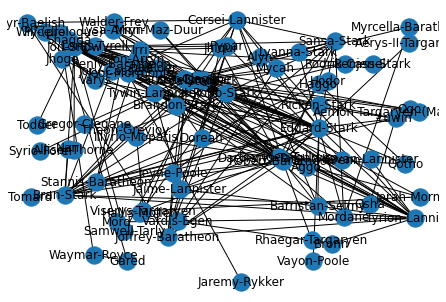

In [7]:
nx.draw_random(G, with_labels=True)

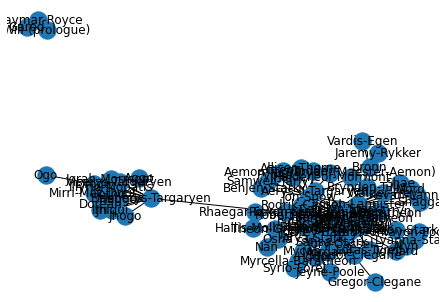

In [8]:
nx.draw_spring(G, with_labels=True)

# Plotly

In [9]:
import plotly.graph_objects as go

import networkx as nx

G = nx.random_geometric_graph(200, 0.125)

edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append('# of connections: '+str(len(adjacencies[1])))

node_trace.marker.color = node_adjacencies
node_trace.text = node_text

fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph made with Python',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

# Dash

In [10]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import dash_cytoscape as cyto
from dash.dependencies import Input, Output
import plotly.express as px

app = dash.Dash(__name__)

app.layout = html.Div([
    html.P("Dash Cytoscape:"),
    cyto.Cytoscape(
        id='cytoscape',
        elements=[
            {'data': {'id': 'ca', 'label': 'Canada'}}, 
            {'data': {'id': 'on', 'label': 'Ontario'}}, 
            {'data': {'id': 'qc', 'label': 'Quebec'}},
            {'data': {'source': 'ca', 'target': 'on'}}, 
            {'data': {'source': 'ca', 'target': 'qc'}}
        ],
        layout={'name': 'breadthfirst'},
        style={'width': '400px', 'height': '500px'}
    )
])

app.run_server(debug=True, use_reloader=False)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


# PyVis

In [18]:
from pyvis.network import Network
G = nx.Graph()
G = nx.from_pandas_edgelist(df1, 'Source', 'Target')
net = Network(height = 800, width = 800, notebook=True)
net.from_nx(G)
net.show("example.html")